In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [153]:
df = pd.read_excel("Customers.xlsx")
df.head(5)

,Customer ID,Gender,Age,Income,Transaction Count,Last Transaction Date,Customer Support Interactions,Order Fulfilment Rate,Churn
0,1,Male,35,75000,10,2022-12-31,2,80.0,0
1,2,Female,45,90000,20,2023-02-28,3,95.0,0
2,3,Male,28,40000,5,2022-11-15,1,60.0,1
3,4,Female,50,120000,15,2023-03-31,0,100.0,0
4,5,Male,60,80000,25,2023-01-31,5,75.0,1


## Data Cleaning

In [154]:
df['Gender'].unique() # Gender Column have whitespace

array(['Male', 'Female', ' Male   ', ' Female '], dtype=object)

In [155]:
df['Gender'] = df['Gender'].str.strip() # Removed whitespace

In [156]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

## Creat New column month and year

In [157]:
df['Year'] = df['Last Transaction Date'].dt.year
df['month'] = df['Last Transaction Date'].dt.month

In [158]:
df.head(5)

,Customer ID,Gender,Age,Income,Transaction Count,Last Transaction Date,Customer Support Interactions,Order Fulfilment Rate,Churn,Year,month
0,1,Male,35,75000,10,2022-12-31,2,80.0,0,2022,12
1,2,Female,45,90000,20,2023-02-28,3,95.0,0,2023,2
2,3,Male,28,40000,5,2022-11-15,1,60.0,1,2022,11
3,4,Female,50,120000,15,2023-03-31,0,100.0,0,2023,3
4,5,Male,60,80000,25,2023-01-31,5,75.0,1,2023,1


In [159]:
df['Year'].unique()

array([2022, 2023], dtype=int64)

In [160]:
df['month'].unique()

array([12,  2, 11,  3,  1, 10,  8,  4], dtype=int64)

In [161]:
#pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [162]:
#import pandas_profiling 

In [163]:
#profile = pandas_profiling.ProfileReport(df)
#profile.to_file(output_file="analysis.html")

# Churn percentage

In [164]:
total_churn_percentage = (len(df[cond1])/len(df['Churn']))*100
total_churn_percentage

36.52173913043478

In [165]:
cond2 = df['Gender']=='Male' # when Gender = Male
cond3 = df['Gender']=='Female' # when Gender = Female

In [166]:
male_churn_percentage = (len(df[cond1 & cond2])/len(df['Churn']))*100
male_churn_percentage  # total percentage of male who get churned

19.130434782608695

In [167]:
female_churn_percentage = (len(df[cond1 & cond3])/len(df['Churn']))*100
female_churn_percentage # total percentage of female who get churned

17.391304347826086

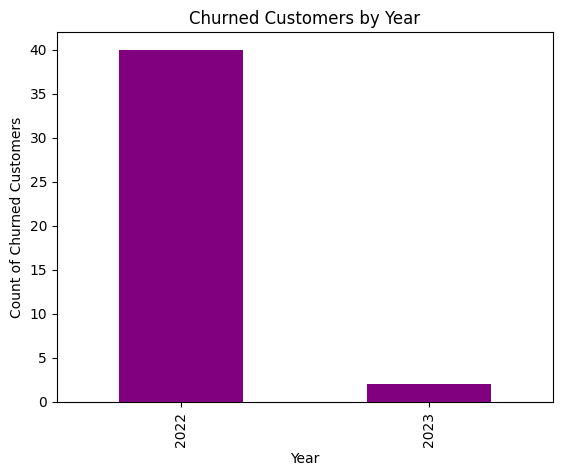

In [168]:
# Filter the data for churned customers
df_churned = df[df['Churn'] == 1]

# Group the data by gender and count the number of churned customers
gender_churn_count = df_churned.groupby('Year')['Churn'].count()

# Create a bar graph using the gender_churn_count data
gender_churn_count.plot(kind='bar', color='purple')

# Set the chart title and axis labels
plt.title('Churned Customers by Year')
plt.xlabel('Year')
plt.ylabel('Count of Churned Customers')

# Show the plot
plt.show()


In [169]:
df_churned = df[df['Churn'] == 1] # Percentage Customer churned in 2022
df_2022 = df_churned[df_churned['Year']== 2022]
Percentage_Customer_churned_in_2022 = len(df_2022)/len(df_churned)*100
Percentage_Customer_churned_in_2022

95.23809523809523

In [170]:
df_2023 = df_churned[df_churned['Year']== 2023]
Percentage_Customer_churned_in_2023 = len(df_2023)/len(df_churned)*100
Percentage_Customer_churned_in_2023

4.761904761904762

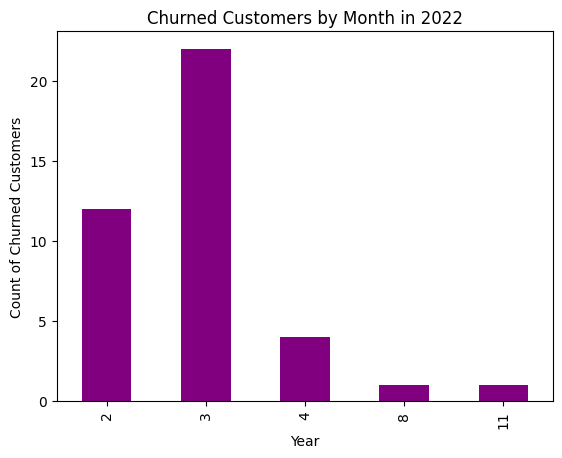

In [171]:
# Filter the data for churned customers in Year 2022
cond_churn = df['Churn'] == 1
cond_2022 = df['Year'] == 2022
df_churned = df[cond_churn & cond_2022 ]

# Group the data by gender and count the number of churned customers
gender_churn_count = df_churned.groupby('month')['Churn'].count()

# Create a bar graph using the gender_churn_count data
gender_churn_count.plot(kind='bar', color='purple')

# Set the chart title and axis labels
plt.title('Churned Customers by Month in 2022')
plt.xlabel('Year')
plt.ylabel('Count of Churned Customers')

# Show the plot
plt.show()

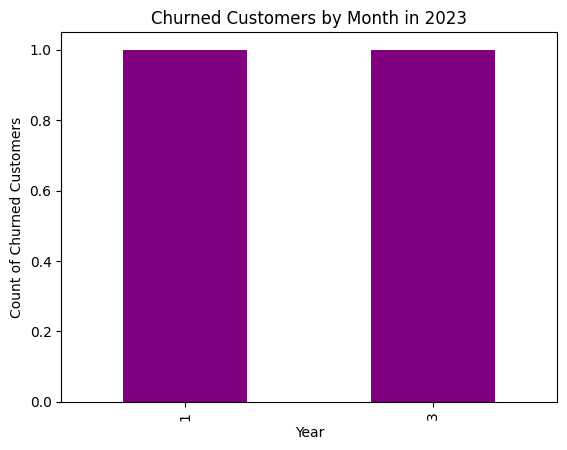

In [172]:
# Filter the data for churned customers in Year 2023
cond_churn = df['Churn'] == 1
cond_2023 = df['Year'] == 2023
df_churned = df[cond_churn & cond_2023 ]

# Group the data by gender and count the number of churned customers
gender_churn_count = df_churned.groupby('month')['Churn'].count()

# Create a bar graph using the gender_churn_count data
gender_churn_count.plot(kind='bar', color='purple')

# Set the chart title and axis labels
plt.title('Churned Customers by Month in 2023')
plt.xlabel('Year')
plt.ylabel('Count of Churned Customers')

# Show the plot
plt.show()

### INSIGHTS:
#### 1.Total percentage of customer got churned is 36.52% in which 19.13%    are male and 17.39% are female.
#### 2.Churn percentage of male is more than Female by nearly 2 %.
#### 3.Transaction Count & Order Fullfillment rate columns are highly correlated with Churn column which means more Transaction and more order fullfillment rate churns more customers.
#### 4. Customer Churn has decrease in 2023 than 2022 by nearly 90%.
#### 5. In year 2022, the Customer chured in month of march is maximum.